#Analyse et Clustering sur le Jeu de Données Iris#

##1.Introduction##

L'objectif est d'appliquer des techniques de clustering sur le jeu de données Iris afin d'identifier des regroupements naturels parmi les observations. Nous utiliserons deux approches : le clustering K-Means et le clustering hiérarchique.

##2.Prétraitement des Données##

Avant d'appliquer les algorithmes de clustering, il est essentiel de préparer les données pour garantir des résultats fiables.

###2.1. Importation des bibliothèques et chargement des données###

Nous commençons par importer les bibliothèques nécessaires et charger le jeu de données.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Téléversement du fichier
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:
# Chargement du dataset
df = pd.read_csv("Iris.csv")

# Affichage des premières lignes du dataset
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


###2.2. Analyse exploratoire des données###

Nous examinons la distribution des données et détectons d'éventuelles valeurs manquantes ou aberrantes.

### Statistiques descriptives ###
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

### Valeurs manquantes par colonne ###
Aucune valeur manquante détectée.

### Types de données ###
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


<Figure size 1200x800 with 0 Axes>

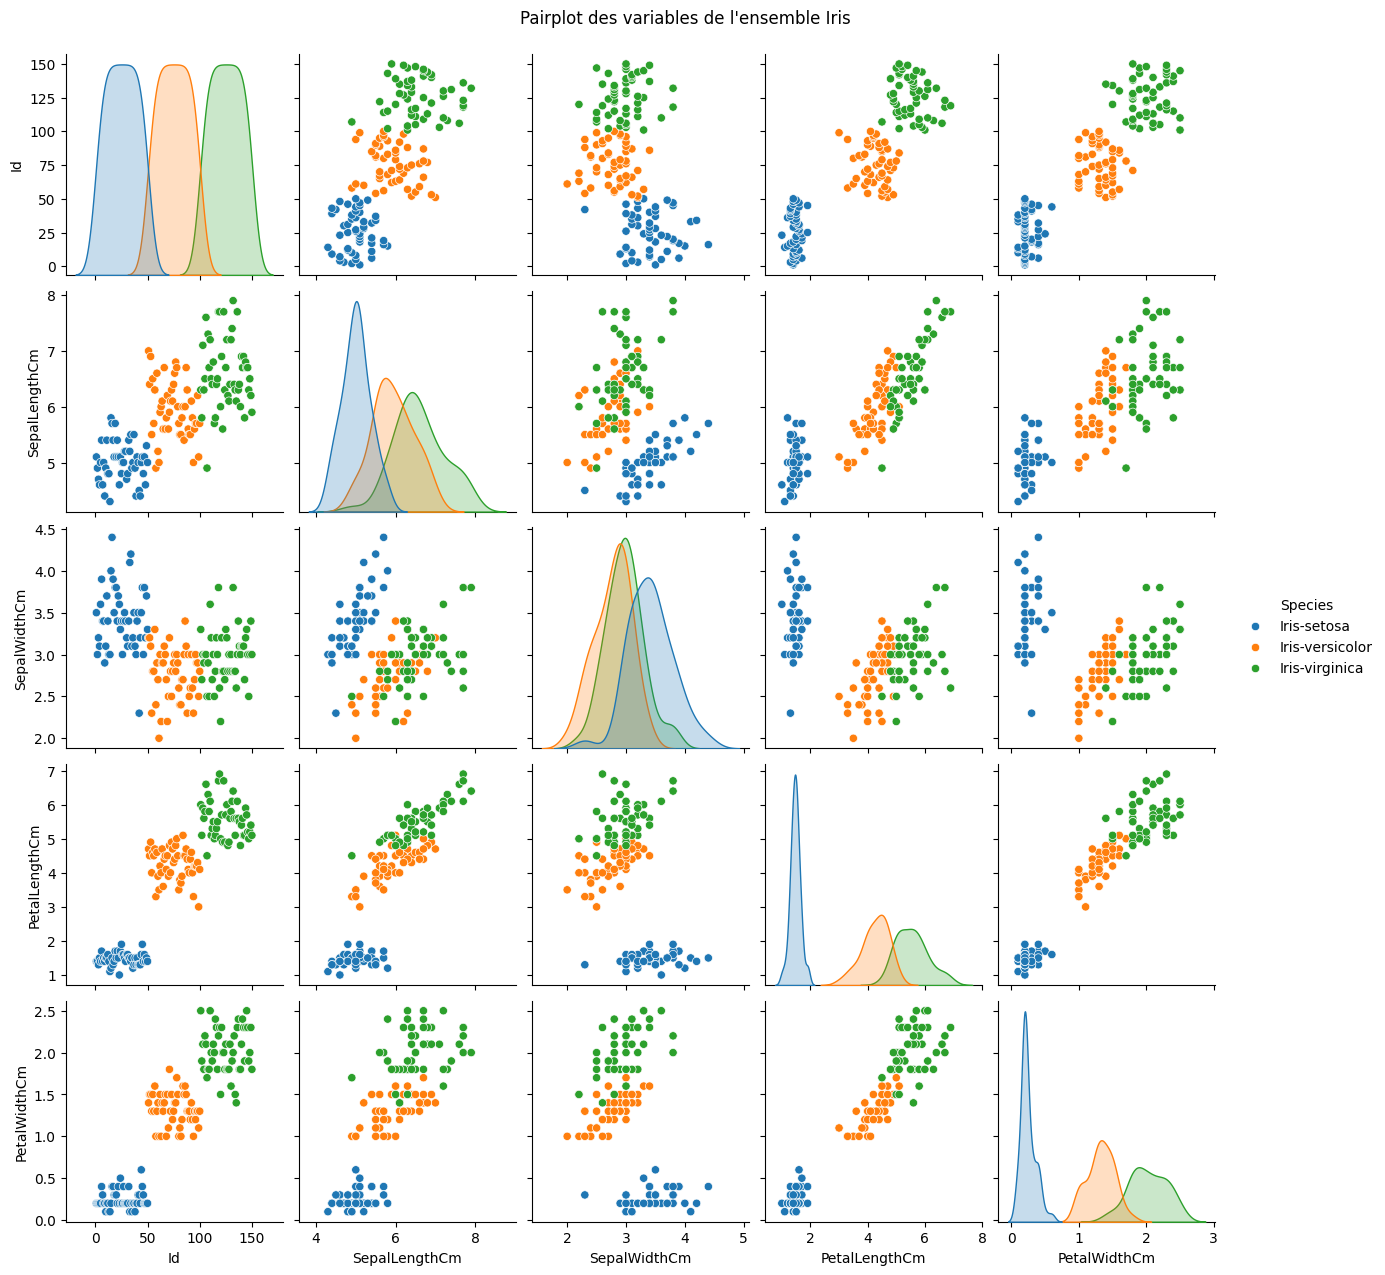

In [7]:
# Affichage des statistiques descriptives
print("### Statistiques descriptives ###")
print(df.describe())  # Affiche les statistiques des variables numériques uniquement

# Détection des valeurs manquantes
missing_values = df.isnull().sum()
print("\n### Valeurs manquantes par colonne ###")
if missing_values.sum() > 0:
    print(missing_values[missing_values > 0])
else:
    print("Aucune valeur manquante détectée.")

# Détection des types de données
print("\n### Types de données ###")
print(df.dtypes)

# Vérification de la présence d'une colonne cible
target_column = df.columns[-1]  # Supposons que la dernière colonne est la classe (ex: 'species')
if df[target_column].dtype == 'object' or df[target_column].nunique() < 10:
    hue_param = target_column  # Utiliser la colonne cible pour colorier les points
else:
    hue_param = None  # Pas de coloration si la colonne cible n'est pas catégorielle

# Visualisation des relations entre les variables
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue=hue_param, diag_kind="kde")  # KDE pour lisser les distributions
plt.suptitle("Pairplot des variables de l'ensemble Iris", y=1.02)
plt.show()


###2.3. Vérification et normalisation des données###

Nous vérifions s'il y a des valeurs manquantes et procédons à la normalisation des données pour éviter que certaines caractéristiques influencent trop le clustering.

In [9]:
# Normalisation des données (exclusion de la colonne cible)
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, :-1]), columns=df.columns[:-1])


##3.Clustering K-Means##

L'algorithme K-Means permet de regrouper les observations en un nombre prédéfini de clusters.

###3.1. Application de K-Means avec 3 clusters###

Nous appliquons K-Means avec K=3

In [10]:
from sklearn.cluster import KMeans

# Application de K-Means avec 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Ajout des clusters aux données
df['KMeans_Cluster'] = kmeans_labels


###3.2. Visualisation des clusters K-Means###

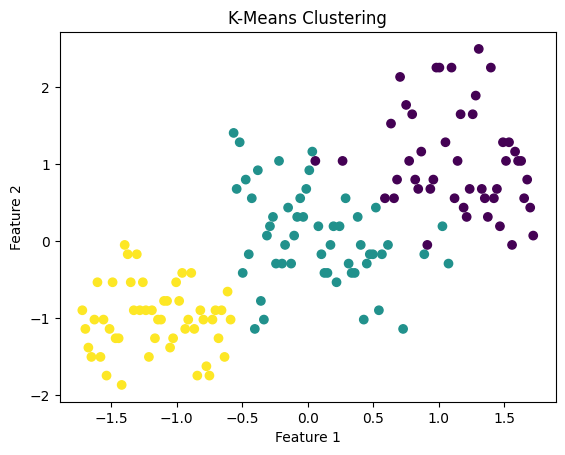

In [11]:
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()


###3.3. Détermination du nombre optimal de clusters###

Nous utilisons la méthode du coude pour choisir la meilleure valeur de K.



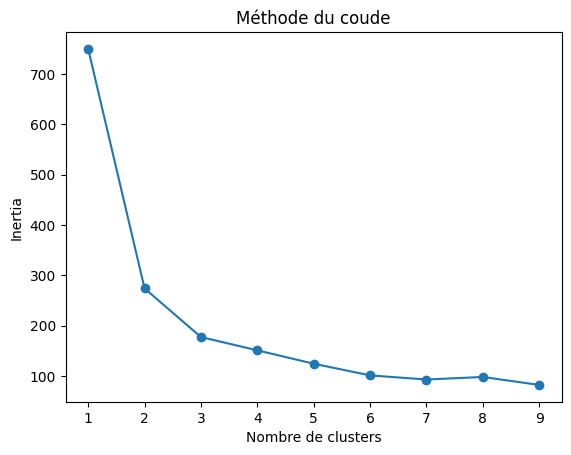

In [12]:
inertia = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertia')
plt.title('Méthode du coude')
plt.show()


##4. Clustering Hiérarchique##

L'algorithme de clustering hiérarchique permet de regrouper les observations en construisant une hiérarchie des similarités.

###4.1. Construction du dendrogramme###

Le dendrogramme permet de visualiser les regroupements et de choisir un nombre optimal de clusters.

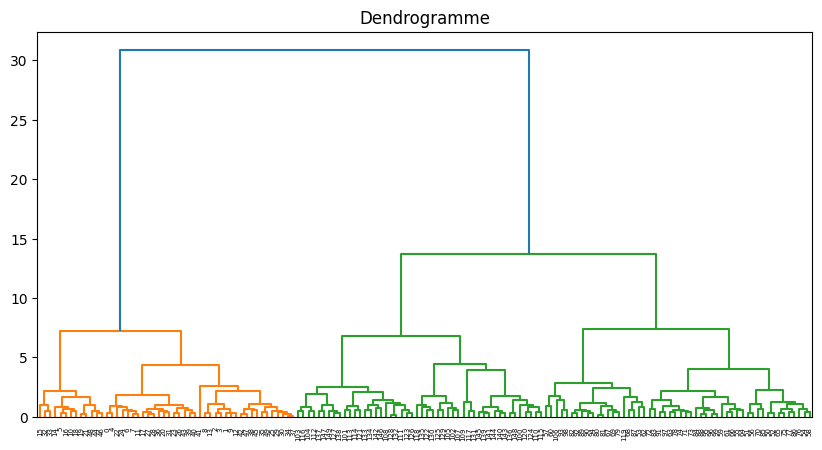

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Génération du dendrogramme
linked = linkage(df_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title('Dendrogramme')
plt.show()


###4.2. Application du clustering hiérarchique###

Nous appliquons le clustering hiérarchique avec 3 clusters.



In [14]:
hc = AgglomerativeClustering(n_clusters=3)
hc_labels = hc.fit_predict(df_scaled)

# Ajout des clusters aux données
df['Hierarchical_Cluster'] = hc_labels


###4.3. Visualisation des clusters hiérarchiques###

Nous représentons graphiquement les clusters obtenus.

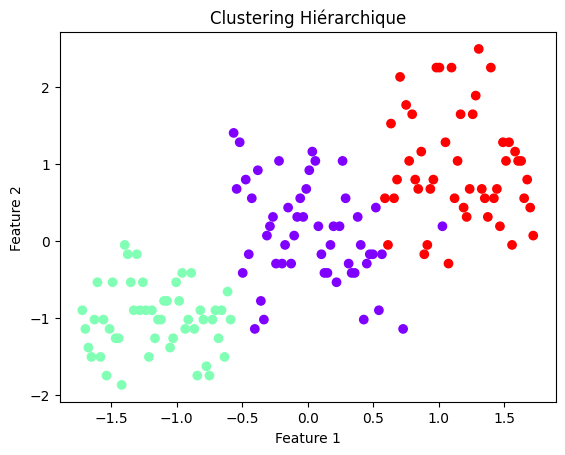

In [15]:
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=hc_labels, cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clustering Hiérarchique')
plt.show()


##4.Clustering DBSCAN##

L'algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise) permet d'identifier des regroupements denses dans les données tout en détectant les points aberrants. Contrairement à K-Means et au clustering hiérarchique, DBSCAN ne nécessite pas de spécifier le nombre de clusters à l'avance.

###4.1. Application de DBSCAN###

Nous appliquons DBSCAN sur le jeu de données standardisé pour détecter les clusters en fonction de la densité locale.

In [16]:
from sklearn.cluster import DBSCAN

# Définition des paramètres
eps = 0.5  # Distance maximale entre deux points pour être considérés voisins
min_samples = 5  # Nombre minimal de points pour former un cluster

# Application de DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_scaled["Cluster_DBSCAN"] = dbscan.fit_predict(df_scaled)

# Affichage des clusters détectés
print(df_scaled["Cluster_DBSCAN"].value_counts())


Cluster_DBSCAN
-1    95
 1    18
 0    14
 3    11
 4     7
 2     5
Name: count, dtype: int64


###4.2. Analyse de l’effet des paramètres ϵ et MinPts###

Les performances de DBSCAN dépendent des valeurs des paramètres :

ϵ (epsilon) : Une valeur trop petite peut fragmenter les clusters, tandis qu'une valeur trop grande risque d’englober trop de points.

MinPts : Un nombre trop élevé risque de ne pas détecter de petits regroupements, tandis qu'une valeur trop faible peut provoquer une détection excessive de clusters.

Nous testons différentes valeurs et observons l'impact sur le nombre de clusters :

In [17]:
for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_scaled)
        print(f"ϵ = {eps}, MinPts = {min_samples} → Nombre de clusters : {len(set(clusters)) - (1 if -1 in clusters else 0)}")


ϵ = 0.3, MinPts = 3 → Nombre de clusters : 3
ϵ = 0.3, MinPts = 5 → Nombre de clusters : 0
ϵ = 0.3, MinPts = 10 → Nombre de clusters : 0
ϵ = 0.5, MinPts = 3 → Nombre de clusters : 11
ϵ = 0.5, MinPts = 5 → Nombre de clusters : 5
ϵ = 0.5, MinPts = 10 → Nombre de clusters : 1
ϵ = 0.7, MinPts = 3 → Nombre de clusters : 10
ϵ = 0.7, MinPts = 5 → Nombre de clusters : 9
ϵ = 0.7, MinPts = 10 → Nombre de clusters : 2


###4.3. Identification des points considérés comme du bruit###
DBSCAN marque certains points comme du bruit (label -1), c’est-à-dire des observations isolées qui ne font partie d’aucun cluster. Nous visualisons ces points sur un graphique :

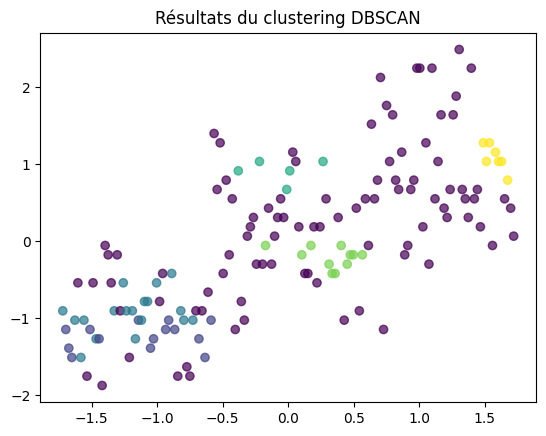

In [18]:
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df_scaled["Cluster_DBSCAN"], cmap="viridis", alpha=0.7)
plt.title("Résultats du clustering DBSCAN")
plt.show()


##5.Analyse et Interprétation##


In [19]:
import pandas as pd
from tabulate import tabulate

# Création du DataFrame
data = {
    "Méthode": ["K-Means", "Clustering hiérarchique", "DBSCAN"],
    "Hypothèses": [
        "Suppose des clusters sphériques et bien séparés",
        "Basé sur les distances entre points",
        "Basé sur la densité des points"
    ],
    "Avantages": [
        "Rapide, efficace pour grands datasets",
        "Permet d’explorer différentes granularités de regroupement",
        "Détecte les outliers, n’impose pas de forme spécifique aux clusters"
    ],
    "Inconvénients": [
        "Nécessite de spécifier K, sensible aux valeurs aberrantes",
        "Coût computationnel élevé pour grands datasets",
        "Sensible aux choix des paramètres ϵ et MinPts"
    ]
}

# Conversion en DataFrame
df = pd.DataFrame(data)

# Affichage sous forme de tableau
print(tabulate(df, headers="keys", tablefmt="grid"))


+----+-------------------------+-------------------------------------------------+---------------------------------------------------------------------+-----------------------------------------------------------+
|    | Méthode                 | Hypothèses                                      | Avantages                                                           | Inconvénients                                             |
+====+=========================+=================================================+=====================================================================+===========================================================+
|  0 | K-Means                 | Suppose des clusters sphériques et bien séparés | Rapide, efficace pour grands datasets                               | Nécessite de spécifier K, sensible aux valeurs aberrantes |
+----+-------------------------+-------------------------------------------------+------------------------------------------------------------------

###5.1. Comparaison des résultats###

K-Means : Identifie bien les 3 espèces d’Iris mais impose des frontières rigides entre les clusters.

Clustering hiérarchique : Offre une meilleure interprétabilité grâce au dendrogramme mais reste sensible aux distances.

DBSCAN : Identifie les clusters naturels et les points aberrants, mais dépend fortement du choix des paramètres.

###5.2. Améliorations possibles###
Optimiser les paramètres : Utiliser l'Elbow Method pour K-Means ou des métriques comme la silhouette score.

Méthodes hybrides : Combiner K-Means avec DBSCAN pour identifier d’abord des groupes initiaux avant d’affiner avec une approche densité.

Exploration d’autres algorithmes : Tester des variantes comme OPTICS (une version améliorée de DBSCAN) ou GMM (Gaussian Mixture Models) pour modéliser la distribution des données.


##Conclusion##

Ce TP nous a permis d'explorer différentes techniques de clustering sur le jeu de données Iris, en mettant en évidence leurs performances et leurs limites. Nous avons observé que K-Means fonctionne bien lorsque les clusters sont bien séparés, que le clustering hiérarchique offre une vision détaillée des regroupements, et que DBSCAN est efficace pour détecter les anomalies sans présupposer une forme particulière pour les clusters.

Pour aller plus loin, nous pourrions appliquer ces mêmes méthodes à d'autres jeux de données afin d'évaluer leur robustesse dans différents contextes. Par exemple :

Le dataset "Wine" : Il contient des caractéristiques chimiques de différents types de vin, ce qui permettrait de regrouper les vins selon leurs similarités chimiques.

Le dataset "Mall Customers" : Il regroupe des informations sur le comportement des clients d’un centre commercial (revenus, habitudes d’achats) et pourrait être utilisé pour segmenter les clients en groupes marketing.

Le dataset "Digits" : Il contient des images de chiffres manuscrits et pourrait nous permettre de tester le clustering sur des données plus complexes, comme la reconnaissance de motifs.

L’application de ces algorithmes à d’autres jeux de données nous permettrait d’évaluer leur efficacité dans des contextes variés et d’explorer des améliorations possibles, comme l’optimisation des paramètres ou l’utilisation de techniques hybrides.

#Compte Rendu : Analyse et Clustering sur le Jeu de Données Mall_Customers#

##1.Prétraitement des Données ##

###1.1. Chargement du jeu de données###



In [21]:
import pandas as pd
from google.colab import files

# Upload du fichier
uploaded = files.upload()



Saving Mall_Customers.csv to Mall_Customers.csv


In [22]:
# Chargement du dataset
df = pd.read_csv("Mall_Customers.csv")

# Affichage des premières lignes du dataset
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


###1.2.Analyse exploratoire des données###

Nous analysons les données pour identifier les valeurs manquantes et comprendre leur distribution.

In [23]:
# Informations générales sur le dataset
print(df.info())

# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Afficher les statistiques descriptives
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.00000

###1.3.Visualisation des données###

Nous utilisons des graphiques pour mieux comprendre la répartition des clients.

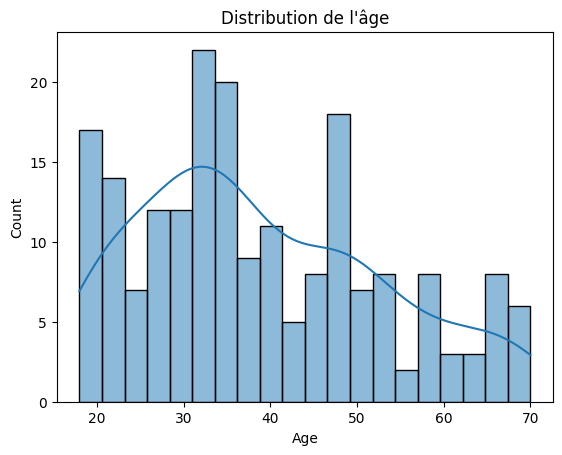

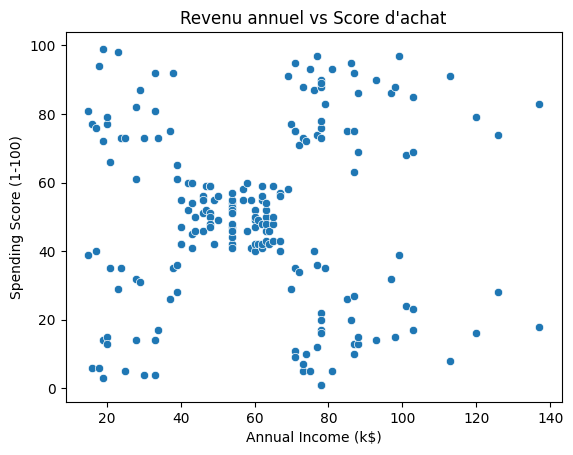

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de l'âge
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Distribution de l'âge")
plt.show()

# Relation entre revenu et score d'achat
sns.scatterplot(x=df["Annual Income (k$)"], y=df["Spending Score (1-100)"])
plt.title("Revenu annuel vs Score d'achat")
plt.show()


###1.4.Normalisation des données###
Nous normalisons les données pour de meilleures performances des algorithmes de clustering.

In [25]:
from sklearn.preprocessing import StandardScaler

# Sélection des variables pertinentes
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Standardisation des données
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)


##2.Clustering K-means##

###2.1.Application de l'algorithme K-means###


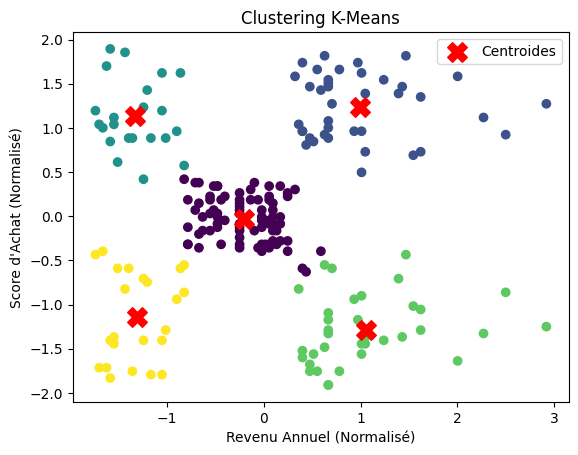

In [26]:
from sklearn.cluster import KMeans

# Choix du nombre de clusters (K=5 ici)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)

# Ajouter les clusters au dataset
df["Cluster_KMeans"] = clusters

# Visualisation des clusters
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap="viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="X", s=200, c="red", label="Centroides")
plt.title("Clustering K-Means")
plt.xlabel("Revenu Annuel (Normalisé)")
plt.ylabel("Score d'Achat (Normalisé)")
plt.legend()
plt.show()


###2.2.Évaluation du clustering###
Nous utilisons la méthode du coude pour déterminer le nombre optimal de clusters.

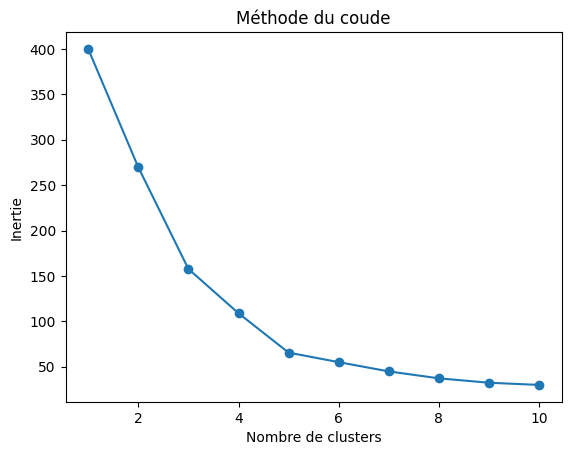

In [27]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.plot(K_range, inertia, marker="o")
plt.title("Méthode du coude")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.show()


##3.Clustering Hiérarchique##

###3.1.Application du clustering hiérarchique###
Nous appliquons un clustering hiérarchique avec différentes méthodes de liaison.

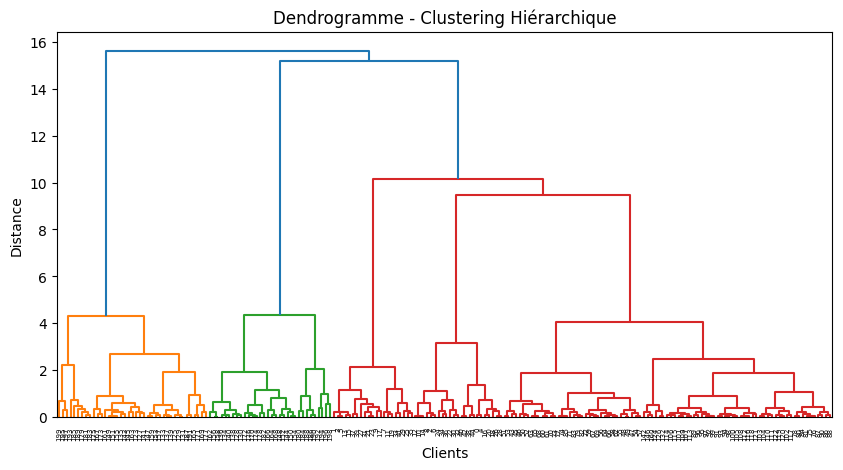

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

# Générer le dendrogramme
linked = linkage(data_scaled, method="ward")

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogramme - Clustering Hiérarchique")
plt.xlabel("Clients")
plt.ylabel("Distance")
plt.show()


###3.2.Création des clusters###
Nous choisissons un nombre de clusters et appliquons le clustering hiérarchique.

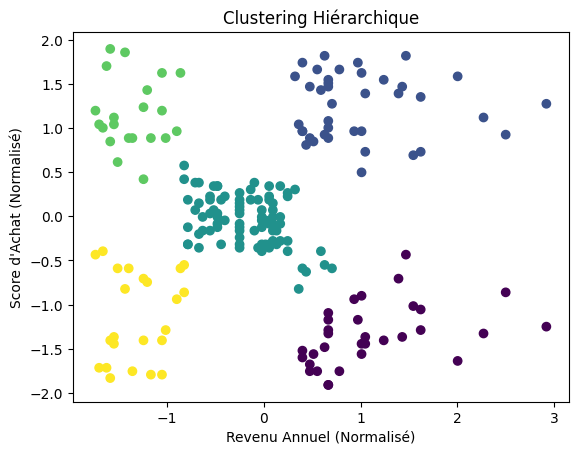

In [29]:
# Appliquer le clustering hiérarchique avec 5 clusters
hc = AgglomerativeClustering(n_clusters=5, linkage="ward")
hc_clusters = hc.fit_predict(data_scaled)

# Ajouter les clusters au dataset
df["Cluster_Hierarchique"] = hc_clusters

# Visualisation
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=hc_clusters, cmap="viridis")
plt.title("Clustering Hiérarchique")
plt.xlabel("Revenu Annuel (Normalisé)")
plt.ylabel("Score d'Achat (Normalisé)")
plt.show()


##4.Clustering DBSCAN##

###4.1.Application de DBSCAN###

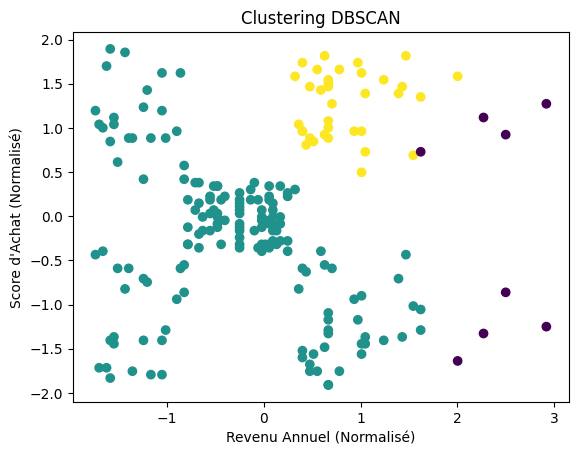

In [30]:
from sklearn.cluster import DBSCAN
import numpy as np

# Application de DBSCAN avec des paramètres initiaux
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(data_scaled)

# Ajouter les clusters DBSCAN au DataFrame
df["Cluster_DBSCAN"] = dbscan_clusters

# Visualisation des clusters DBSCAN
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_clusters, cmap="viridis")
plt.title("Clustering DBSCAN")
plt.xlabel("Revenu Annuel (Normalisé)")
plt.ylabel("Score d'Achat (Normalisé)")
plt.show()


Dans ce code, nous avons utilisé les variables revenu annuel et score d’achat pour visualiser les clusters formés par DBSCAN. Les paramètres ϵ = 0.5 et MinPts = 5 sont un bon point de départ, mais nous allons ajuster ces paramètres pour voir comment ils influencent la formation des clusters.



###4.2.Analyse de l’effet des paramètres ϵ et MinPts###
L'un des avantages de DBSCAN est qu'il peut s'adapter aux clusters de forme irrégulière. Toutefois, il est important de bien choisir les paramètres ϵ et MinPts pour éviter une mauvaise segmentation.

Effet de ϵ (epsilon)

Si ϵ est trop petit, DBSCAN risque de créer trop de clusters ou même de n’en créer aucun, car la distance entre les points est trop grande pour être considérée comme un voisinage.

Si ϵ est trop grand, DBSCAN pourrait fusionner des groupes distincts de clients en un seul cluster.
Effet de MinPts

Si MinPts est faible (par exemple, MinPts=3), DBSCAN pourrait créer des clusters trop fins ou même inclure des bruits comme des clusters.

Si MinPts est trop élevé, certains petits groupes de clients (qui pourraient être intéressants) risquent de ne pas être détectés.

Nous allons ajuster ϵ et MinPts et observer l’impact sur la segmentation des clients.

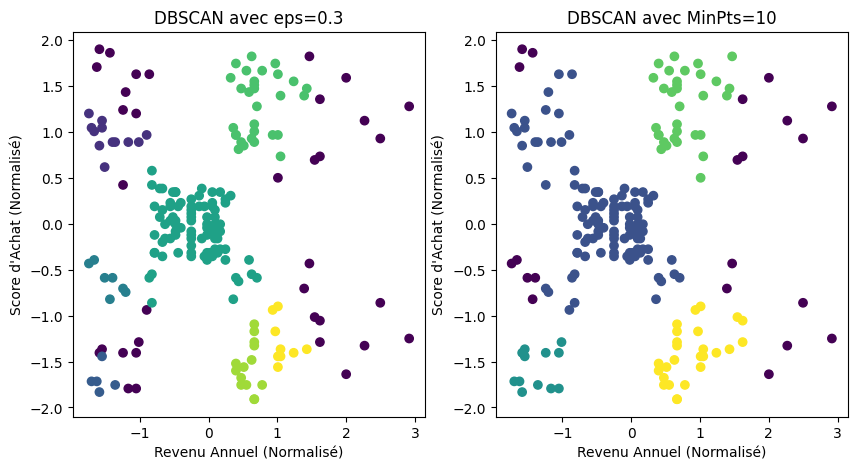

In [31]:
# Essayer avec un ϵ plus petit
dbscan_small_eps = DBSCAN(eps=0.3, min_samples=5)
clusters_small_eps = dbscan_small_eps.fit_predict(data_scaled)

# Essayer avec un MinPts plus élevé
dbscan_high_minpts = DBSCAN(eps=0.5, min_samples=10)
clusters_high_minpts = dbscan_high_minpts.fit_predict(data_scaled)

# Visualisation des clusters avec un petit epsilon
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_small_eps, cmap="viridis")
plt.title("DBSCAN avec eps=0.3")
plt.xlabel("Revenu Annuel (Normalisé)")
plt.ylabel("Score d'Achat (Normalisé)")

# Visualisation des clusters avec un MinPts plus élevé
plt.subplot(1, 2, 2)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters_high_minpts, cmap="viridis")
plt.title("DBSCAN avec MinPts=10")
plt.xlabel("Revenu Annuel (Normalisé)")
plt.ylabel("Score d'Achat (Normalisé)")
plt.show()


Ces ajustements permettent d’observer comment DBSCAN détecte les groupes de clients à partir des données.

###4.3.Identification des Points de Bruit###
DBSCAN identifie les points de bruit, qui sont les clients ne satisfaisant pas les critères de densité pour être regroupés dans un cluster. Ces points de bruit sont marqués par la valeur -1.

In [32]:
# Identifier les points considérés comme du bruit
noise_points = df[df["Cluster_DBSCAN"] == -1]

# Afficher les points de bruit
print("Nombre de points de bruit : ", len(noise_points))
print("Points de bruit :")
print(noise_points)


Nombre de points de bruit :  8
Points de bruit :
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
191         192  Female   32                 103                      69   
192         193    Male   33                 113                       8   
194         195  Female   47                 120                      16   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster_KMeans  Cluster_Hierarchique  Cluster_DBSCAN  
191               1                     1              -1  
192               3                     0              -1  
194               3                     0              -1  
195               1       

Cette section permet de repérer les clients dont le comportement est trop atypique pour être groupé avec d'autres.



##5.Analyse et Interprétation des Résultats##


omparaison des Résultats des Différents Algorithmes de Clustering

K-means :

K-means a tendance à bien fonctionner sur des clusters denses et sphériques. Cependant, dans le cas du dataset Mall Customers, les clusters ne sont pas nécessairement sphériques et pourraient être mal capturés. De plus, la méthode nécessite de spécifier le nombre de clusters à l'avance.

Clustering Hiérarchique :

Le clustering hiérarchique est intéressant pour explorer les relations entre les clients à différents niveaux de granularité. Il produit un dendrogramme qui peut être utile pour visualiser les regroupements, mais il est moins pratique pour des jeux de données très volumineux comme Mall Customers.

DBSCAN :

DBSCAN est particulièrement adapté pour ce genre de données, car il ne nécessite pas de nombre de clusters prédéfini et peut identifier des groupes de clients de formes variées (par exemple, des segments de clients ayant des comportements d'achat très différents). DBSCAN est aussi plus robuste aux bruits et aux anomalies dans les données.
